# Line Charge Electric Field

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.constants as cst
%matplotlib inline

In [2]:
def Efield(x,y,mu,x0,y0):
    """
    Electric field line charge
    mu line charge
    
    Inputs:
        (float) x  : x coordinate potential
        (float) y  : y coordinate potential
        (float) mu : line charge
        (float) x0 : x coordinate wire
        (float) y0 : y coordinate wire
    """
#     factor = mu/(2*np.pi*cst.epsilon_0)
    factor = mu
    dr = np.sqrt((x-x0)**2+(y-y0)**2)
    return factor/dr * np.array([(x-x0)/dr, (y-y0)/dr])

C:\Users\Olivier\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in true_divide
  app.launch_new_instance()
C:\Users\Olivier\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in true_divide
  app.launch_new_instance()
C:\Users\Olivier\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in greater
  import sys


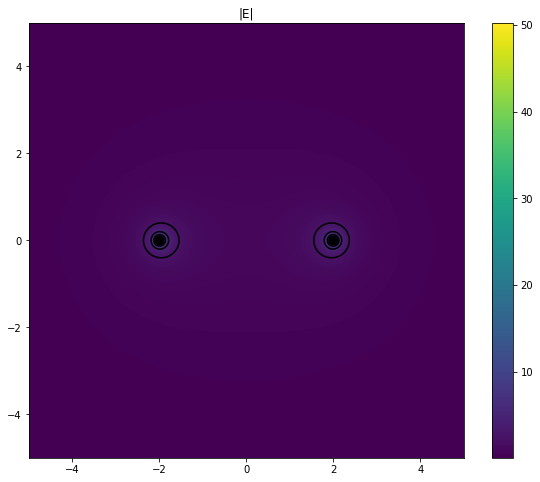

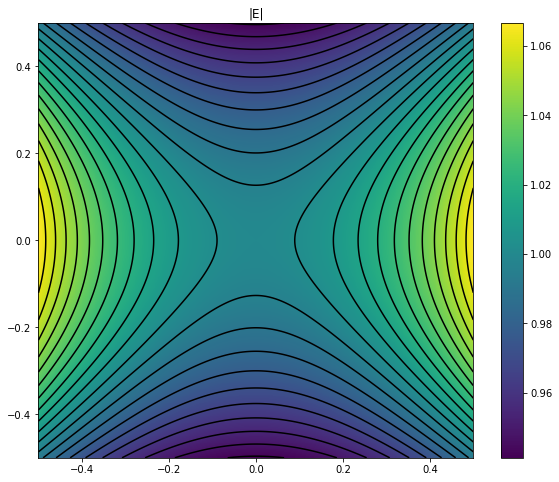

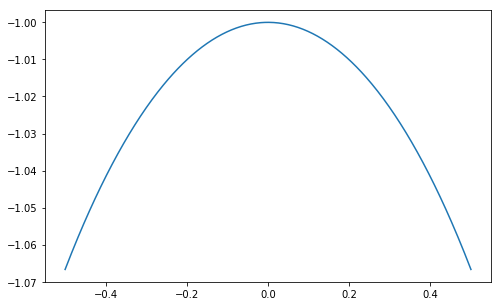

In [3]:
y,x = np.mgrid[5:-5:501j,5:-5:501j]
Ex,Ey = Efield(x,y,-1,-2,0)
Ex1,Ey1 = Efield(x,y,1,2,0)
Ex += Ex1
Ey += Ey1
E = np.sqrt(Ex**2+Ey**2)
E[E > 1e10] = 0

fig, ax = plt.subplots(figsize = (10,8))
ax.set_title('|E|')
pc = ax.pcolormesh(x, y, E)
ax.contour(x, y, E, 20, colors = 'k')
ax.set(aspect = 1);
fig.colorbar(pc);

y,x = np.mgrid[0.5:-0.5:501j,0.5:-0.5:501j]
Ex,Ey = Efield(x,y,-1,-2,0)
Ex1,Ey1 = Efield(x,y,1,2,0)
Ex += Ex1
Ey += Ey1

fig, ax = plt.subplots(figsize = (10,8))
ax.set_title('|E|')
pc = ax.pcolormesh(x, y, np.sqrt(Ex**2+Ey**2))
ax.contour(x, y, np.sqrt(Ex**2+Ey**2), 20, colors = 'k')
ax.set(aspect = 1);
fig.colorbar(pc);

xc, yc = x.shape
xc //= 2
yc //= 2

fig, ax = plt.subplots(figsize =(8,5))
ax.plot(x[xc,:],Ex[xc,:])

# Minimize Field over Region

First testing one V shaped array of rods

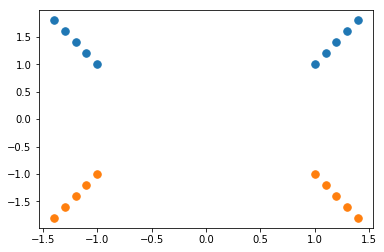

In [4]:
nwires = 5
x0wire = 1
y0wire = 1
dxwire = 0.1
dywire = 0.2
wires = np.zeros((3,4*nwires))
for n in range(nwires):
    wires[0][n] = -x0wire - n*dxwire
    wires[1][n] = y0wire + n*dywire
    wires[2][n] = 1
    wires[0][n+5] = x0wire + n*dxwire
    wires[1][n+5] = y0wire + n*dywire
    wires[2][n+5] = 1
    wires[0][n+10] = -x0wire - n*dxwire
    wires[1][n+10] = -y0wire - n*dywire
    wires[2][n+10] = -1
    wires[0][n+15] = x0wire + n*dxwire
    wires[1][n+15] = -y0wire - n*dywire
    wires[2][n+15] = -1
    
plt.plot(wires.T[wires[2] == 1].T[0], wires.T[wires[2] == 1].T[1], '.', ms = 15)
plt.plot(wires.T[wires[2] == 1].T[0], wires.T[wires[2] == -1].T[1], '.', ms = 15);

In [33]:
def wires_field(x,y,wires):
    xwires = wires[0]
    ywires = wires[1]
    charge = wires[2]
    Ex = np.zeros(x.shape)
    Ey = np.zeros(y.shape)
    for xw,yw,cw in zip(xwires, ywires, charge):
        field = Efield(x, y, cw, xw, yw)
        Ex += field[0]
        Ey += field[1]
    
    return Ex,Ey

In [34]:
dx = .025
dy = .025
y,x = np.mgrid[-2:2:501j,-2:2:501j]
w = wires.copy()
Ex,Ey = wires_field(x,y,w)
E = np.sqrt(Ex**2+Ex**2)

C:\Users\Olivier\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in true_divide
  app.launch_new_instance()
C:\Users\Olivier\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in true_divide
  app.launch_new_instance()


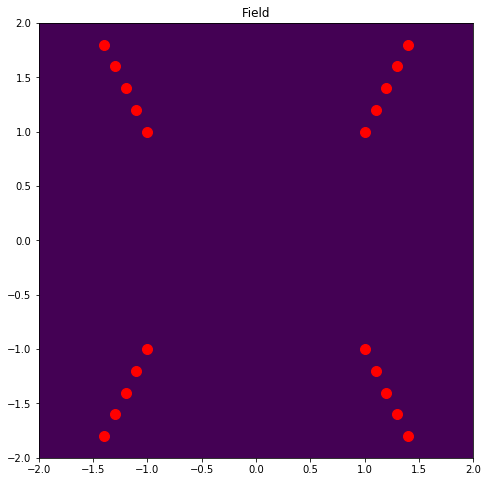

In [35]:
fig, ax = plt.subplots(figsize = (8,8))
ax.set_title('Field')
ax.pcolormesh(x, y, E)
ax.contour(x, y, E, 30, colors = 'k')
ax.set(aspect = 1);
ax.plot(w[0,:],w[1,:], 'r.', ms = 20)

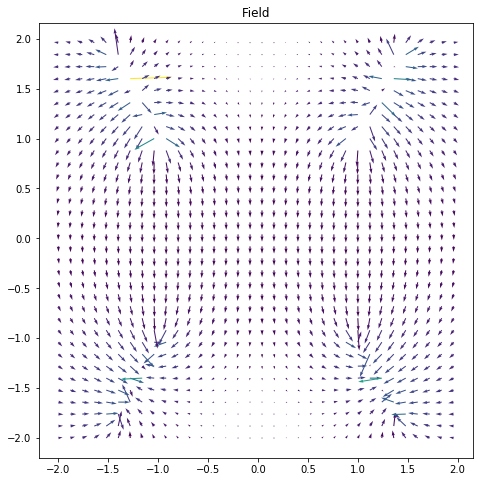

In [36]:
skip = (slice(None, None, 15), slice(None, None, 15))

fig, ax = plt.subplots(figsize = (8,8))
ax.set_title('Field')
ax.quiver(x[skip], y[skip], Ex[skip], Ey[skip], E[skip])
ax.set(aspect=1);

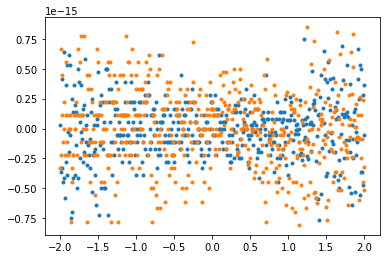

In [37]:
plt.plot(x[250,:], Ex[250,:], '.')
plt.plot(y[:,250], Ex[:,250], '.')

Minimization function minimizes the integral of $\frac{\left(E_y-E_y(0,0)\right)^2}{E_y(0,0)^2}$ over the surface the molecular beam interacts with.

In [42]:
def minimize_function(charges, x, y, wires):
    xc, yc = x.shape
    xc //= 2
    yc //= 2
    w = wires.copy()
    c = np.array(list(charges)*4)*w[2,:]
    w[2,:] = c
    Ex, Ey = wires_field(x, y, w)
    E = np.sqrt(Ex**2+Ey**2)
    return ((E-E[xc,yc])**2).sum()/E[xc,yc]**2

In [43]:
y,x = np.mgrid[0.5:-0.5:101j,0.5:-0.5:101j]

from scipy.optimize import minimize
bounds = [(0,10)]*5
x0 = [1]*5
m = minimize(minimize_function, x0 = x0, bounds = bounds, args = (x, y, wires))
m

      fun: 1.185504848447077
 hess_inv: <5x5 LbfgsInvHessProduct with dtype=float64>
      jac: array([1.43945955e+00, 6.92574242e-01, 3.12354276e-01, 1.10553655e-01,
       8.88178420e-08])
  message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 42
      nit: 5
   status: 0
  success: True
        x: array([ 0.,  0.,  0.,  0., 10.])

In [53]:
w = wires.copy()
w[2,:] = w[2,:]*np.array(list(m.x)*4)

Ex, Ey = wires_field(x,y,w)
E = np.sqrt(Ex**2+Ey**2)
xc, yc = E.shape
xc //= 2
yc //= 2

maximum field inhomogeneity : 4.88 %


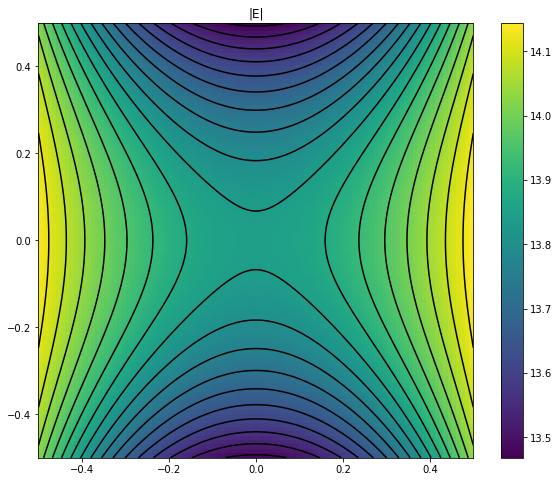

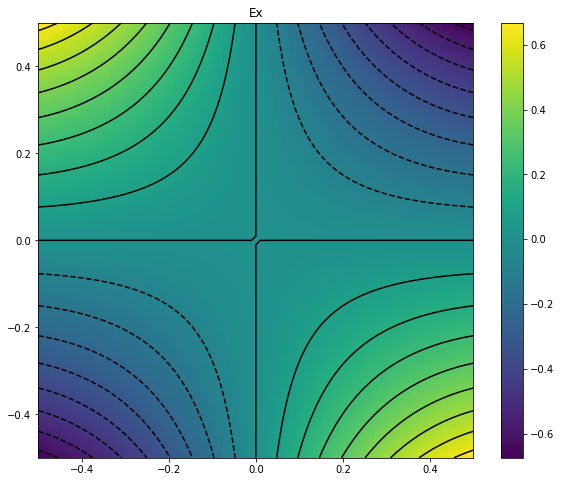

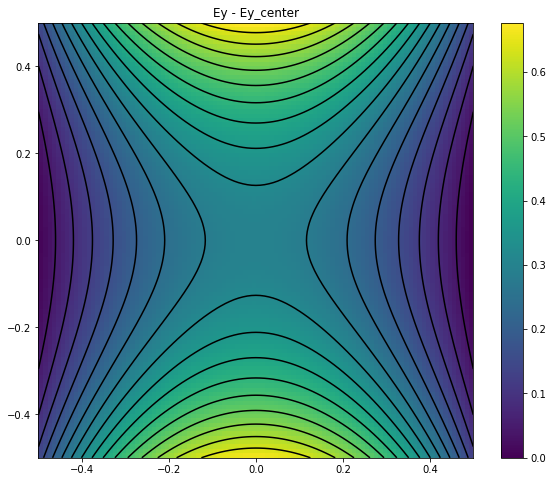

In [54]:
print('maximum field inhomogeneity : {0:.2f} %'.format(100*np.abs((E.ptp())/E[xc,yc])))

fig, ax = plt.subplots(figsize = (10,8))
ax.set_title('|E|')
pc = ax.pcolormesh(x, y, np.sqrt(Ex**2+Ey**2))
ax.contour(x, y, np.sqrt(Ex**2+Ey**2), 20, colors = 'k')
ax.set(aspect = 1);
fig.colorbar(pc);

fig, ax = plt.subplots(figsize = (10,8))
ax.set_title('Ex')
pc = ax.pcolormesh(x, y, Ex)
ax.contour(x, y, Ex, 20, colors = 'k')
ax.set(aspect = 1);
fig.colorbar(pc);

fig, ax = plt.subplots(figsize = (10,8))
ax.set_title('Ey - Ey_center')
pc = ax.pcolormesh(x, y, Ey-Ey.min())
ax.contour(x, y, Ey-Ey.min(), 20, colors = 'k')
ax.set(aspect = 1);
fig.colorbar(pc);

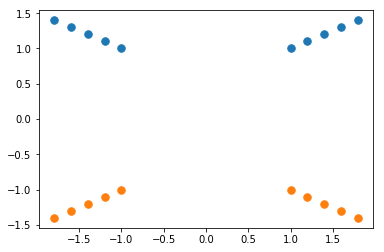

In [55]:
nwires = 5
x0wire = 1
y0wire = 1
dxwire = 0.2
dywire = 0.1
wires = np.zeros((3,4*nwires))
for n in range(nwires):
    wires[0][n] = -x0wire - n*dxwire
    wires[1][n] = y0wire + n*dywire
    wires[2][n] = 1
    wires[0][n+5] = x0wire + n*dxwire
    wires[1][n+5] = y0wire + n*dywire
    wires[2][n+5] = 1
    wires[0][n+10] = -x0wire - n*dxwire
    wires[1][n+10] = -y0wire - n*dywire
    wires[2][n+10] = -1
    wires[0][n+15] = x0wire + n*dxwire
    wires[1][n+15] = -y0wire - n*dywire
    wires[2][n+15] = -1
  
plt.plot(wires.T[wires[2] == 1].T[0], wires.T[wires[2] == 1].T[1], '.', ms = 15)
plt.plot(wires.T[wires[2] == 1].T[0], wires.T[wires[2] == -1].T[1], '.', ms = 15);

In [56]:
y,x = np.mgrid[0.5:-0.5:101j,0.5:-0.5:101j]

from scipy.optimize import minimize
bounds = [(0,10)]*5
x0 = [1]*5
m = minimize(minimize_function, x0 = x0, bounds = bounds, args = (x, y, wires))
m

      fun: 9.78195845949251
 hess_inv: <5x5 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 3.55035308e+00,  2.11908109e+00,  1.11135776e+00,  4.40270931e-01,
       -7.10542736e-07])
  message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 42
      nit: 4
   status: 0
  success: True
        x: array([0.        , 0.        , 0.        , 0.        , 7.98416971])

In [57]:
w = wires.copy()
w[2,:] = w[2,:]*np.array(list(m.x)*4)

Ex, Ey = wires_field(x,y,w)
E = np.sqrt(Ex**2+Ey**2)
xc, yc = E.shape
xc //= 2
yc //= 2

maximum field inhomogeneity : 14.31 %


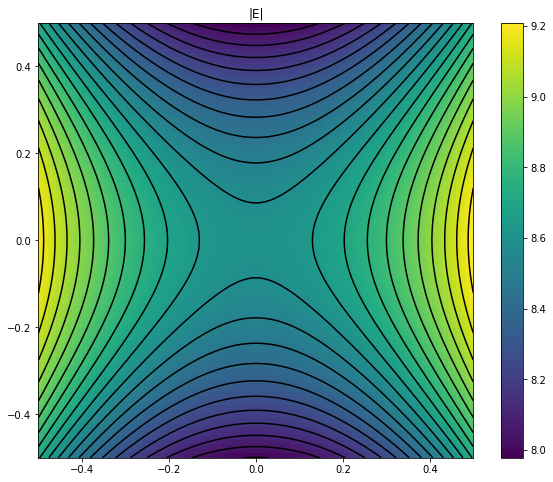

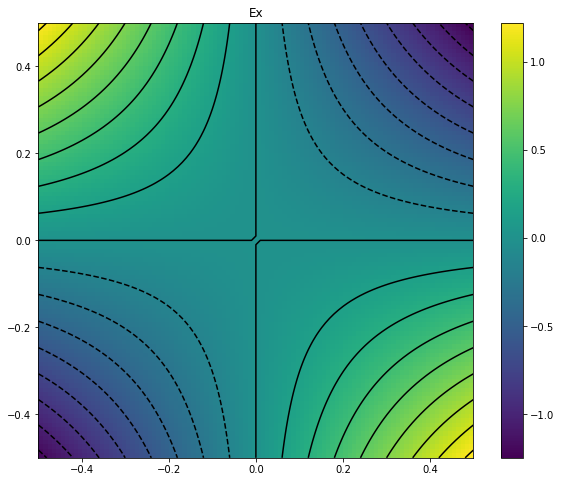

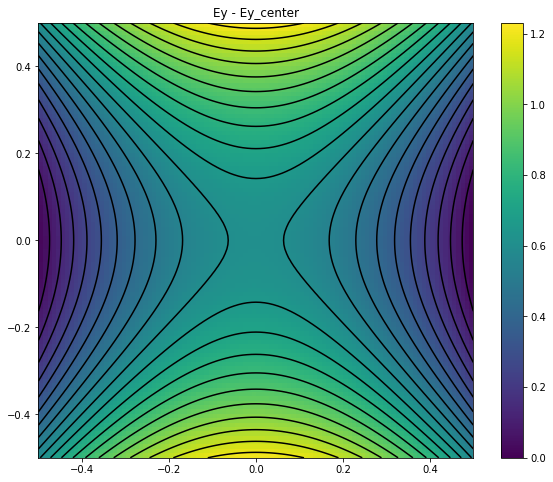

In [58]:
print('maximum field inhomogeneity : {0:.2f} %'.format(100*np.abs((E.ptp())/E[xc,yc])))

fig, ax = plt.subplots(figsize = (10,8))
ax.set_title('|E|')
pc = ax.pcolormesh(x, y, np.sqrt(Ex**2+Ey**2))
ax.contour(x, y, np.sqrt(Ex**2+Ey**2), 20, colors = 'k')
ax.set(aspect = 1);
fig.colorbar(pc);

fig, ax = plt.subplots(figsize = (10,8))
ax.set_title('Ex')
pc = ax.pcolormesh(x, y, Ex)
ax.contour(x, y, Ex, 20, colors = 'k')
ax.set(aspect = 1);
fig.colorbar(pc);

fig, ax = plt.subplots(figsize = (10,8))
ax.set_title('Ey - Ey_center')
pc = ax.pcolormesh(x, y, Ey-Ey.min())
ax.contour(x, y, Ey-Ey.min(), 20, colors = 'k')
ax.set(aspect = 1);
fig.colorbar(pc);

# Horizontal wires

Array of wires spanned horizontally over the molecular beam, beam comes out of screen. With the microwave polarization at a $45^\circ$ angle to the wires, half the power should get to the interaction region

### Wires at fixed positions; voltage varied

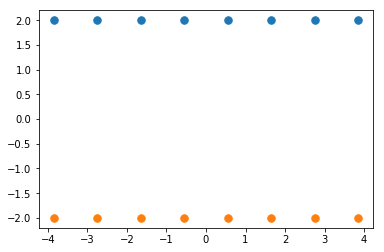

In [71]:
nwires = 4
x0wire = .55
y0wire = 2
dxwire = 1.1
dywire = 0
wires = np.zeros((3,4*nwires))
for n in range(nwires):
    wires[0][n] = -x0wire - n*dxwire
    wires[1][n] = y0wire + n*dywire
    wires[2][n] = 1
    wires[0][n+nwires] = x0wire + n*dxwire
    wires[1][n+nwires] = y0wire + n*dywire
    wires[2][n+nwires] = 1
    wires[0][n+nwires*2] = -x0wire - n*dxwire
    wires[1][n+nwires*2] = -y0wire - n*dywire
    wires[2][n+nwires*2] = -1
    wires[0][n+nwires*3] = x0wire + n*dxwire
    wires[1][n+nwires*3] = -y0wire - n*dywire
    wires[2][n+nwires*3] = -1
    
plt.plot(wires.T[wires[2] == 1].T[0], wires.T[wires[2] == 1].T[1], '.', ms = 15)
plt.plot(wires.T[wires[2] == 1].T[0], wires.T[wires[2] == -1].T[1], '.', ms = 15);

In [76]:
def minimize_function(charges, x, y, wires):
    xc, yc = x.shape
    xc //= 2
    yc //= 2
    w = wires.copy()
    c = np.array(list(charges)*4)*w[2,:]
    w[2,:] = c
    Ex, Ey = wires_field(x, y, w)
    E = np.sqrt(Ex**2+Ey**2)
    return ((E-E[xc,yc])**2).sum()/E[xc,yc]**2

In [77]:
y,x = np.mgrid[-.6:.6:101j,-1.2:1.2:201j]

from scipy.optimize import minimize
bounds = [(0,10)]*nwires
x0 = np.array([1]*nwires)
m = minimize(minimize_function, x0 = x0, bounds = bounds, args = (x, y, wires))

w = wires.copy()
w[2,:] = w[2,:]*np.array(list(m.x)*4)

Ex, Ey = wires_field(x,y,w)
E = np.sqrt(Ex**2+Ey**2)
xc, yc = E.shape
xc //= 2
yc //= 2

m

      fun: 0.0001849765551305455
 hess_inv: <4x4 LbfgsInvHessProduct with dtype=float64>
      jac: array([-5.34625458e-05,  1.91194933e-05, -2.35003694e-05,  5.26522836e-05])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 85
      nit: 13
   status: 0
  success: True
        x: array([0.90933735, 0.85945888, 1.34820224, 1.22069184])

maximum field inhomogeneity : 0.07 %


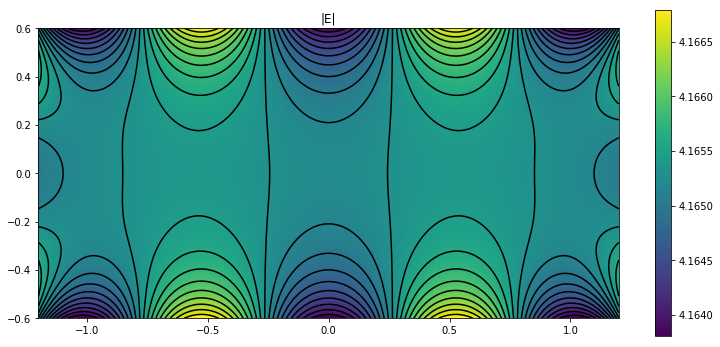

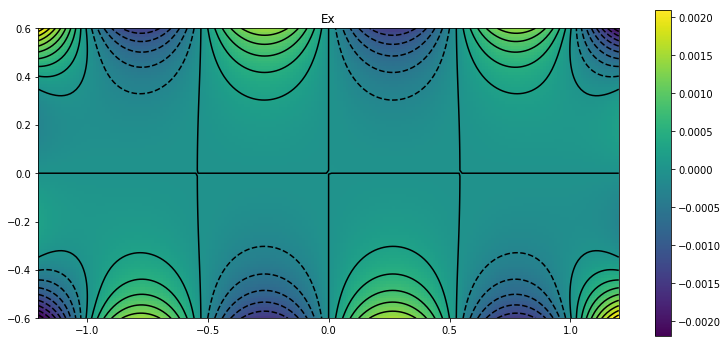

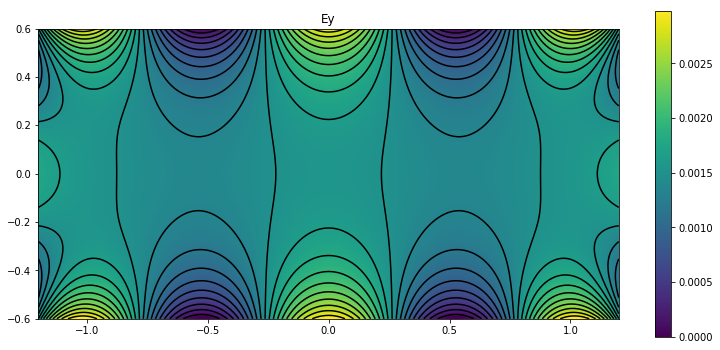

In [78]:
print('maximum field inhomogeneity : {0:.2f} %'.format(100*np.abs((E.ptp())/E[xc,yc])))

fig, ax = plt.subplots(figsize = (13,6))
ax.set_title('|E|')
pc = ax.pcolormesh(x, y, np.sqrt(Ex**2+Ey**2))
ax.contour(x, y, np.sqrt(Ex**2+Ey**2), 20, colors = 'k')
ax.set(aspect = 1);
fig.colorbar(pc);

fig, ax = plt.subplots(figsize = (13,6))
ax.set_title('Ex')
pc = ax.pcolormesh(x, y, Ex)
ax.contour(x, y, Ex, 20, colors = 'k')
ax.set(aspect = 1);
fig.colorbar(pc);

fig, ax = plt.subplots(figsize = (13,6))
ax.set_title('Ey')
pc = ax.pcolormesh(x, y, Ey-Ey.min())
ax.contour(x, y, Ey-Ey.min(), 20, colors = 'k')
ax.set(aspect = 1);
fig.colorbar(pc);

In [80]:
y,x = np.mgrid[-.6:.6:101j,-1.2:1.2:201j]

from scipy.optimize import minimize
bounds = [(0,10)]*nwires
x0 = np.array([1]*nwires)
m = minimize(minimize_function, x0 = x0, bounds = bounds, args = (x, y, wires), method = 'SLSQP')

w = wires.copy()
w[2,:] = w[2,:]*np.array(list(m.x)*4)

Ex, Ey = wires_field(x,y,w)
E = np.sqrt(Ex**2+Ey**2)
xc, yc = E.shape
xc //= 2
yc //= 2

m

     fun: 0.00017655768242370897
     jac: array([ 5.62735995e-04,  1.21213816e-07, -2.63251086e-04, -1.25195133e-04])
 message: 'Optimization terminated successfully.'
    nfev: 62
     nit: 10
    njev: 10
  status: 0
 success: True
       x: array([1.6434556 , 1.53490735, 2.58800927, 1.94389752])

maximum field inhomogeneity : 0.07 %


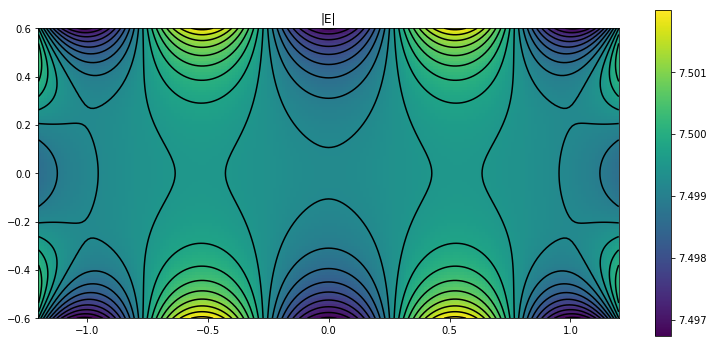

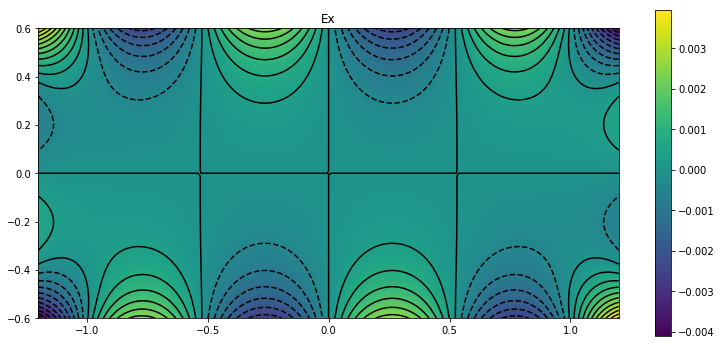

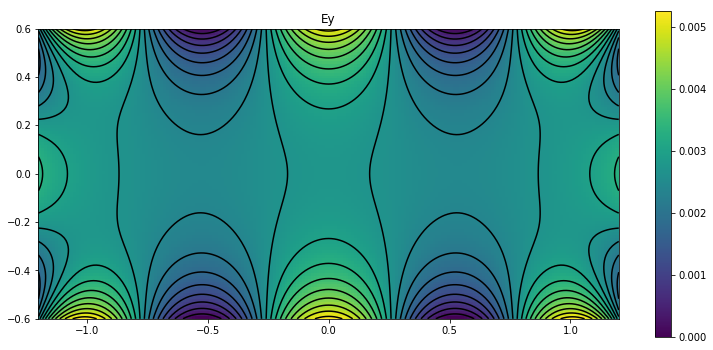

In [81]:
print('maximum field inhomogeneity : {0:.2f} %'.format(100*np.abs((E.ptp())/E[xc,yc])))

fig, ax = plt.subplots(figsize = (13,6))
ax.set_title('|E|')
pc = ax.pcolormesh(x, y, np.sqrt(Ex**2+Ey**2))
ax.contour(x, y, np.sqrt(Ex**2+Ey**2), 20, colors = 'k')
ax.set(aspect = 1);
fig.colorbar(pc);

fig, ax = plt.subplots(figsize = (13,6))
ax.set_title('Ex')
pc = ax.pcolormesh(x, y, Ex)
ax.contour(x, y, Ex, 20, colors = 'k')
ax.set(aspect = 1);
fig.colorbar(pc);

fig, ax = plt.subplots(figsize = (13,6))
ax.set_title('Ey')
pc = ax.pcolormesh(x, y, Ey-Ey.min())
ax.contour(x, y, Ey-Ey.min(), 20, colors = 'k')
ax.set(aspect = 1);
fig.colorbar(pc);

In [82]:
w = wires.copy()
w[2,:] = w[2,:]*np.array(list(m.x.round(1))*4)

Ex, Ey = wires_field(x,y,w)
E = np.sqrt(Ex**2+Ey**2)

maximum field inhomogeneity : 0.24 %


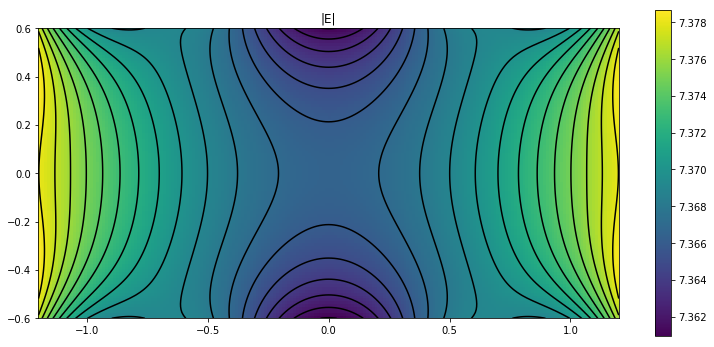

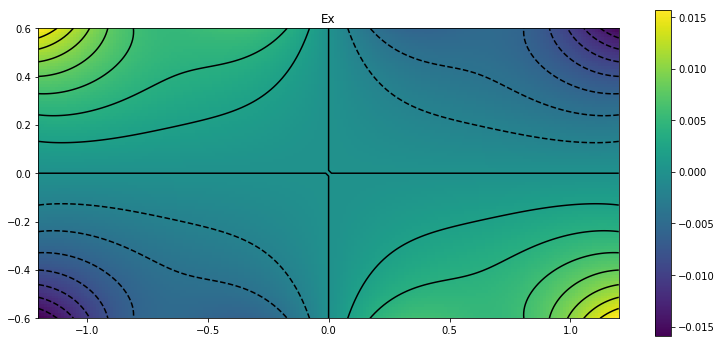

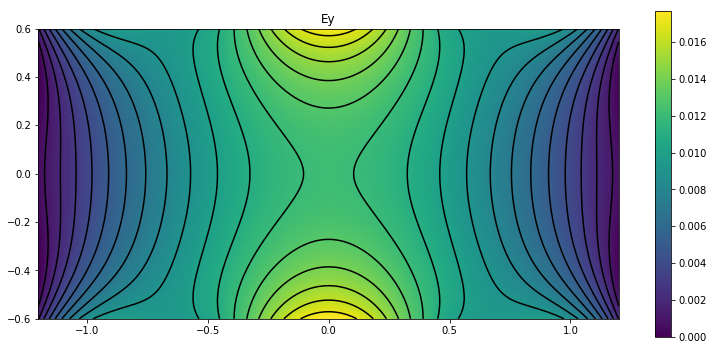

In [83]:
print('maximum field inhomogeneity : {0:.2f} %'.format(100*np.abs((E.ptp())/E[xc,yc])))

fig, ax = plt.subplots(figsize = (13,6))
ax.set_title('|E|')
pc = ax.pcolormesh(x, y, np.sqrt(Ex**2+Ey**2))
ax.contour(x, y, np.sqrt(Ex**2+Ey**2), 20, colors = 'k')
ax.set(aspect = 1);
fig.colorbar(pc);

fig, ax = plt.subplots(figsize = (13,6))
ax.set_title('Ex')
pc = ax.pcolormesh(x, y, Ex)
ax.contour(x, y, Ex, 20, colors = 'k')
ax.set(aspect = 1);
fig.colorbar(pc);

fig, ax = plt.subplots(figsize = (13,6))
ax.set_title('Ey')
pc = ax.pcolormesh(x, y, Ey-Ey.min())
ax.contour(x, y, Ey-Ey.min(), 20, colors = 'k')
ax.set(aspect = 1);
fig.colorbar(pc);

In [103]:
y,x = np.mgrid[-.6:.6:101j,-1.2:1.2:201j]

mmin = minimize_function(m.x.round(1), x, y, wires)
print('iter #{0:>6} : mmin = {1:.2e}'.format(0, mmin))
cmin = np.zeros(x0.size)
iters = 0
np.random.seed(1)
while True:
    try:
        iters += 1
        c = m.x.round(1).copy()
        c += np.abs(np.random.randint(-3,3,nwires)/10)
        mm = minimize_function(c, x, y, wires)
        if mm < mmin:
            print('iter #{0:>6} : mmin = {1:.2e}'.format(iters, mm))
            mmin = mm
            cmin = c
    except KeyboardInterrupt:
        print()
        print('Stop random minimum finder after {0} iterations'.format(iters))
        print('start mmin : {0:.2e}; stop mmin {1:.2e}'.format(minimize_function(x0, x, y, wires), mmin))
        print()
        print(cmin)
        break

iter #     0 : mmin = 9.53e-03
iter #     6 : mmin = 6.82e-03
iter #     9 : mmin = 5.53e-04
iter #    64 : mmin = 5.16e-04

Stop random minimum finder after 729 iterations
start mmin : 1.32e+00; stop mmin 5.16e-04

[1.8 1.7 2.9 2. ]


In [104]:
w = wires.copy()
w[2,:] = np.array(list(cmin)*4)*wires[2,:]

Ex, Ey = wires_field(x,y,w)
E = np.sqrt(Ex**2+Ey**2)

maximum field inhomogeneity : 0.09 %


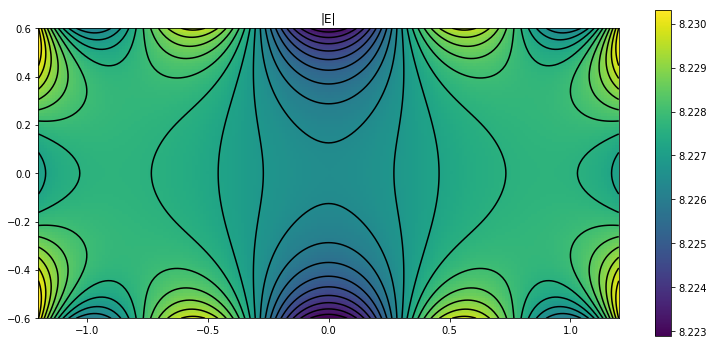

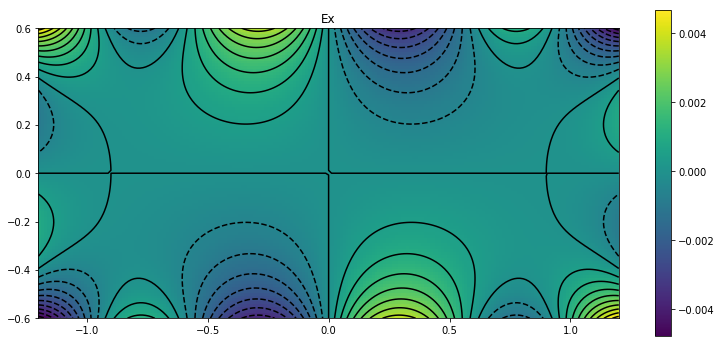

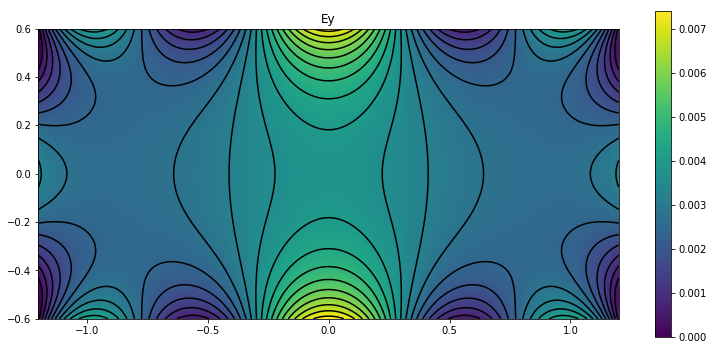

In [105]:
print('maximum field inhomogeneity : {0:.2f} %'.format(100*np.abs((E.ptp())/E[xc,yc])))

fig, ax = plt.subplots(figsize = (13,6))
ax.set_title('|E|')
pc = ax.pcolormesh(x, y, np.sqrt(Ex**2+Ey**2))
ax.contour(x, y, np.sqrt(Ex**2+Ey**2), 20, colors = 'k')
ax.set(aspect = 1);
fig.colorbar(pc);

fig, ax = plt.subplots(figsize = (13,6))
ax.set_title('Ex')
pc = ax.pcolormesh(x, y, Ex)
ax.contour(x, y, Ex, 20, colors = 'k')
ax.set(aspect = 1);
fig.colorbar(pc);

fig, ax = plt.subplots(figsize = (13,6))
ax.set_title('Ey')
pc = ax.pcolormesh(x, y, Ey-Ey.min())
ax.contour(x, y, Ey-Ey.min(), 20, colors = 'k')
ax.set(aspect = 1);
fig.colorbar(pc);

In [106]:
dx = .025
dy = .025
y,x = np.mgrid[-2.5:2.5:501j,-4:4:501j]

Ex, Ey = wires_field(x,y,w)
E = np.sqrt(Ex**2+Ey**2)

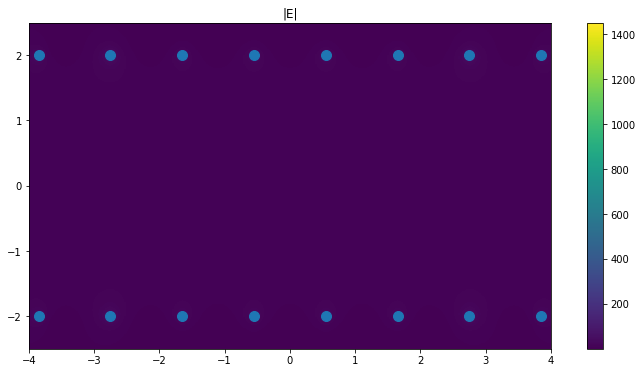

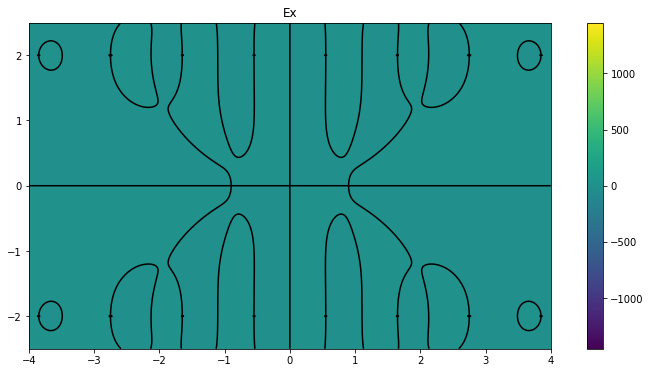

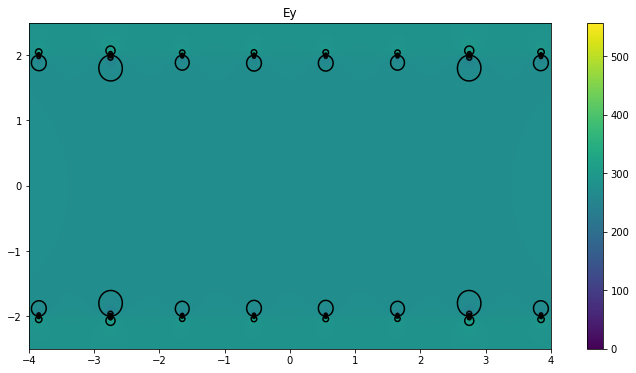

In [107]:
fig, ax = plt.subplots(figsize = (13,6))
ax.set_title('|E|')
pc = ax.pcolormesh(x, y, np.sqrt(Ex**2+Ey**2))
ax.contour(x, y, np.sqrt(Ex**2+Ey**2), 20, colors = 'k')
ax.set(aspect = 1);
fig.colorbar(pc);
ax.plot(w[0,:], w[1,:], '.', ms = 20)

fig, ax = plt.subplots(figsize = (13,6))
ax.set_title('Ex')
pc = ax.pcolormesh(x, y, Ex)
ax.contour(x, y, Ex, 20, colors = 'k')
ax.set(aspect = 1);
fig.colorbar(pc);

fig, ax = plt.subplots(figsize = (13,6))
ax.set_title('Ey')
pc = ax.pcolormesh(x, y, Ey-Ey.min())
ax.contour(x, y, Ey-Ey.min(), 20, colors = 'k')
ax.set(aspect = 1);
fig.colorbar(pc);

# Both V shaped rod arrays

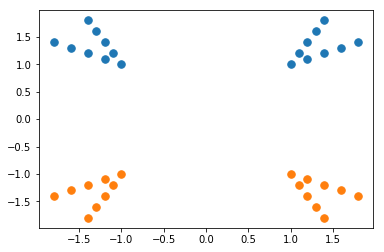

In [131]:
nwires = 5
x0wire = 1
x0wire2 = 1
y0wire = 1
y0wire2 = 1
dxwire = 0.1
dywire = 0.2
dxwire2 = 0.2
dywire2 = 0.1
wires = np.zeros((3,4*nwires+4*(nwires-1)))
for n in range(nwires):
    wires[0][n] = -x0wire - n*dxwire
    wires[1][n] = y0wire + n*dywire
    wires[2][n] = 1
    wires[0][n+5] = x0wire + n*dxwire
    wires[1][n+5] = y0wire + n*dywire
    wires[2][n+5] = 1
    wires[0][n+10] = -x0wire - n*dxwire
    wires[1][n+10] = -y0wire - n*dywire
    wires[2][n+10] = -1
    wires[0][n+15] = x0wire + n*dxwire
    wires[1][n+15] = -y0wire - n*dywire
    wires[2][n+15] = -1
    if n > 0:
        wires[0][n+19] = -x0wire2 - n*dxwire2
        wires[1][n+19] = y0wire2 + n*dywire2
        wires[2][n+19] = 1
        wires[0][n+23] = x0wire2 + n*dxwire2
        wires[1][n+23] = y0wire2 + n*dywire2
        wires[2][n+23] = 1
        wires[0][n+27] = - x0wire2 - n*dxwire2
        wires[1][n+27] = - y0wire2 - n*dywire2
        wires[2][n+27] = -1
        wires[0][n+31] = x0wire2 + n*dxwire2
        wires[1][n+31] = -y0wire2 - n*dywire2
        wires[2][n+31] = -1

plt.plot(wires.T[wires[2] == 1].T[0], wires.T[wires[2] == 1].T[1], '.', ms = 15)
plt.plot(wires.T[wires[2] == 1].T[0], wires.T[wires[2] == -1].T[1], '.', ms = 15);

In [143]:
def minimize_function(charges, x, y, wires):
    xc, yc = x.shape
    xc //= 2
    yc //= 2
    w = wires.copy()
    c = np.array(list(charges)*4)*w[2,:]
    w[2,:] = c
    Ex, Ey = wires_field(x, y, w)
    E = np.sqrt(Ex**2+Ey**2)
    return ((E-E[xc,yc])**2).sum()/E[xc,yc]**2

In [144]:
y,x = np.mgrid[-.6:.6:101j,-1.2:1.2:201j]

from scipy.optimize import minimize
bounds = [(0,10)]*(2*nwires-1)
x0 = np.array([1]*(2*nwires-1))
m = minimize(minimize_function, x0 = x0, bounds = bounds, args = (x, y, wires))

w = wires.copy()
w[2,:] = w[2,:]*np.array(list(m.x)*4)

Ex, Ey = wires_field(x,y,w)
E = np.sqrt(Ex**2+Ey**2)
xc, yc = E.shape
xc //= 2
yc //= 2

m

      fun: 274.3794933429645
 hess_inv: <9x9 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 3.25741780e+00,  1.65700953e+01,  1.87987609e+01,  7.60780949e+00,
        6.25277607e-05,  1.63362415e+01,  2.63494712e+01,  1.00036004e+01,
       -8.52651283e-05])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 270
      nit: 21
   status: 0
  success: True
        x: array([0.        , 0.        , 0.        , 0.        , 9.48971977,
       0.        , 0.        , 0.        , 8.45418195])

maximum field inhomogeneity : 41.60 %


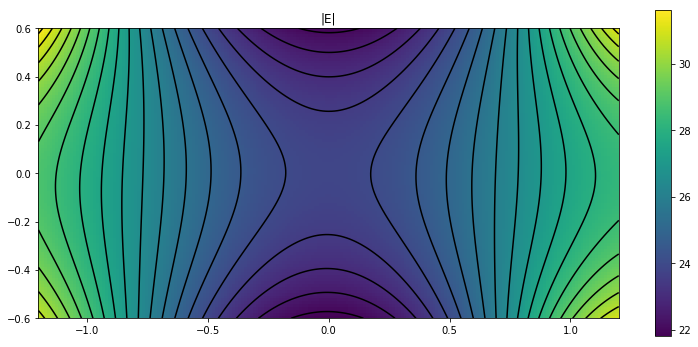

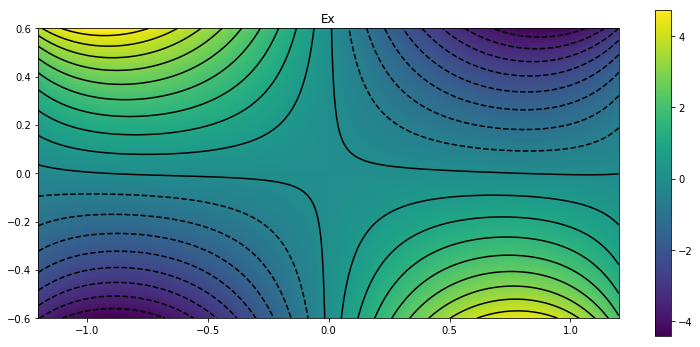

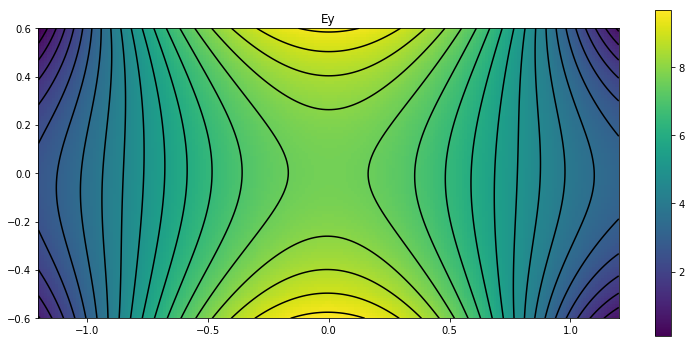

In [145]:
print('maximum field inhomogeneity : {0:.2f} %'.format(100*np.abs((E.ptp())/E[xc,yc])))

fig, ax = plt.subplots(figsize = (13,6))
ax.set_title('|E|')
pc = ax.pcolormesh(x, y, np.sqrt(Ex**2+Ey**2))
ax.contour(x, y, np.sqrt(Ex**2+Ey**2), 20, colors = 'k')
ax.set(aspect = 1);
fig.colorbar(pc);

fig, ax = plt.subplots(figsize = (13,6))
ax.set_title('Ex')
pc = ax.pcolormesh(x, y, Ex)
ax.contour(x, y, Ex, 20, colors = 'k')
ax.set(aspect = 1);
fig.colorbar(pc);

fig, ax = plt.subplots(figsize = (13,6))
ax.set_title('Ey')
pc = ax.pcolormesh(x, y, Ey-Ey.min())
ax.contour(x, y, Ey-Ey.min(), 20, colors = 'k')
ax.set(aspect = 1);
fig.colorbar(pc);

# Changing Wire Positions; all same voltage

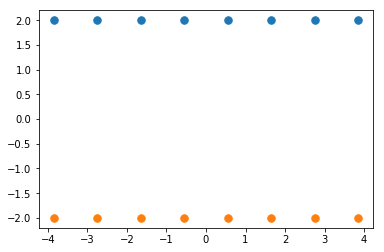

In [154]:
nwires = 4
x0wire = .55
y0wire = 2
dxwire = 1.1
dywire = 0
wires = np.zeros((3,4*nwires))
for n in range(nwires):
    wires[0][n] = -x0wire - n*dxwire
    wires[1][n] = y0wire + n*dywire
    wires[2][n] = 1
    wires[0][n+nwires] = x0wire + n*dxwire
    wires[1][n+nwires] = y0wire + n*dywire
    wires[2][n+nwires] = 1
    wires[0][n+nwires*2] = -x0wire - n*dxwire
    wires[1][n+nwires*2] = -y0wire - n*dywire
    wires[2][n+nwires*2] = -1
    wires[0][n+nwires*3] = x0wire + n*dxwire
    wires[1][n+nwires*3] = -y0wire - n*dywire
    wires[2][n+nwires*3] = -1
    
plt.plot(wires.T[wires[2] == 1].T[0], wires.T[wires[2] == 1].T[1], '.', ms = 15)
plt.plot(wires.T[wires[2] == 1].T[0], wires.T[wires[2] == -1].T[1], '.', ms = 15);

In [173]:
def minimize_function(wpos, x, y, wires):
    xc, yc = x.shape
    xc //= 2
    yc //= 2
    w = wires.copy()
    wpos = list(np.append(-wpos, wpos))*2
    w[0,:] = wpos
    Ex, Ey = wires_field(x, y, w)
    E = np.sqrt(Ex**2+Ey**2)
    return ((E-E[xc,yc])**2).sum()/E[xc,yc]**2

In [175]:
y,x = np.mgrid[-.6:.6:101j,-1.2:1.2:201j]

from scipy.optimize import minimize
bounds = [(0.1,4)]*nwires
x0 = np.array([0.9,2,3,3.9])
m = minimize(minimize_function, x0 = x0, bounds = bounds, args = (x, y, wires))

w = wires.copy()
w[0,:] = wpos = list(np.append(-m.x, m.x))*2

Ex, Ey = wires_field(x,y,w)
E = np.sqrt(Ex**2+Ey**2)
xc, yc = E.shape
xc //= 2
yc //= 2

m

      fun: 0.00036459188092956453
 hess_inv: <4x4 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 1.81482119e-04,  1.36083256e-05, -8.70129327e-05,  1.78542549e-04])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 170
      nit: 26
   status: 0
  success: True
        x: array([0.58673797, 1.94286251, 2.45391642, 3.67597284])

maximum field inhomogeneity : 0.12 %


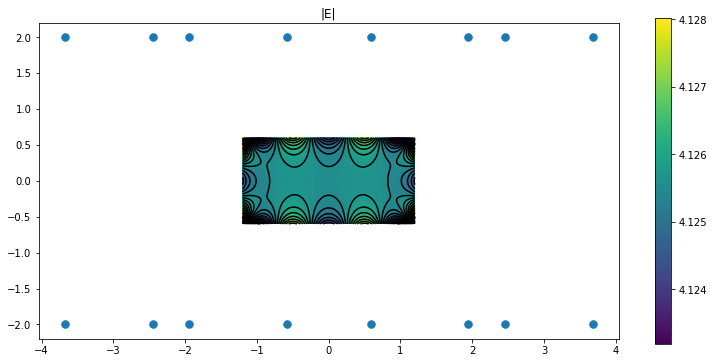

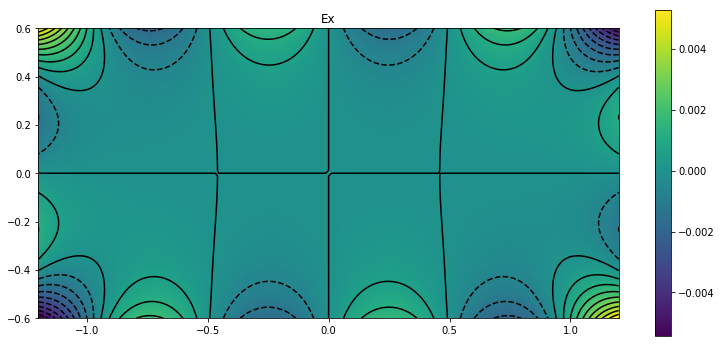

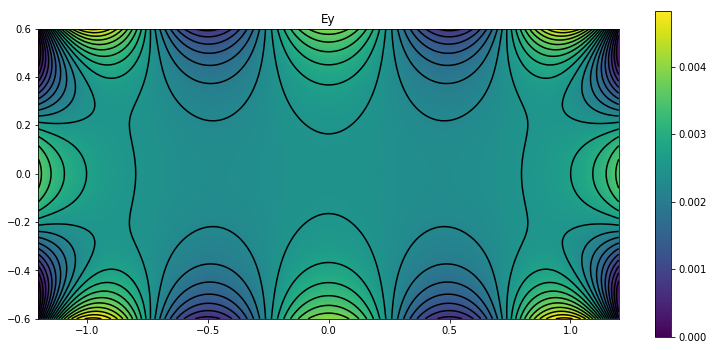

In [176]:
print('maximum field inhomogeneity : {0:.2f} %'.format(100*np.abs((E.ptp())/E[xc,yc])))

fig, ax = plt.subplots(figsize = (13,6))
ax.set_title('|E|')
pc = ax.pcolormesh(x, y, np.sqrt(Ex**2+Ey**2))
ax.contour(x, y, np.sqrt(Ex**2+Ey**2), 20, colors = 'k')
ax.set(aspect = 1);
fig.colorbar(pc);
ax.plot(w[0,:], w[1,:], '.', ms = 15)

fig, ax = plt.subplots(figsize = (13,6))
ax.set_title('Ex')
pc = ax.pcolormesh(x, y, Ex)
ax.contour(x, y, Ex, 20, colors = 'k')
ax.set(aspect = 1);
fig.colorbar(pc);

fig, ax = plt.subplots(figsize = (13,6))
ax.set_title('Ey')
pc = ax.pcolormesh(x, y, Ey-Ey.min())
ax.contour(x, y, Ey-Ey.min(), 20, colors = 'k')
ax.set(aspect = 1);
fig.colorbar(pc);

In [177]:
# %%timeit
import time
from scipy.optimize import minimize, basinhopping, brute
np.random.seed(2)
while True:
    x0 = np.random.random(nwires)*4
    if np.sum(x0 > bounds[0][0]) == nwires:
        break
x0.sort()
r = (slice(0.1,1.5,0.1), slice(1,3,0.1), slice(2,4.1,0.1), slice(2,4.1,0.1))
tstart = time.time()
m = brute(minimize_function, args = (x, y, wires), ranges = r, disp = True, full_output=True, finish = None)
print('{0:.2f} s'.format(time.time()-tstart))
m[0]

712.73 s


array([0.6, 1.9, 3.5, 2.7])

In [178]:
w = wires.copy()
w[0,:] = wpos = list(np.append(-m[0], m[0]))*2

Ex, Ey = wires_field(x,y,w)
E = np.sqrt(Ex**2+Ey**2)
xc, yc = E.shape
xc //= 2
yc //= 2

maximum field inhomogeneity : 0.13 %


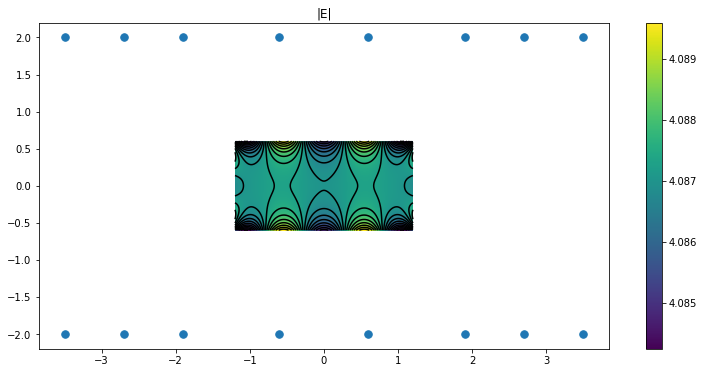

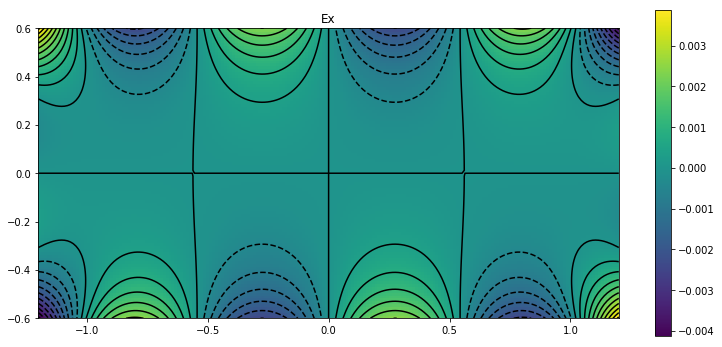

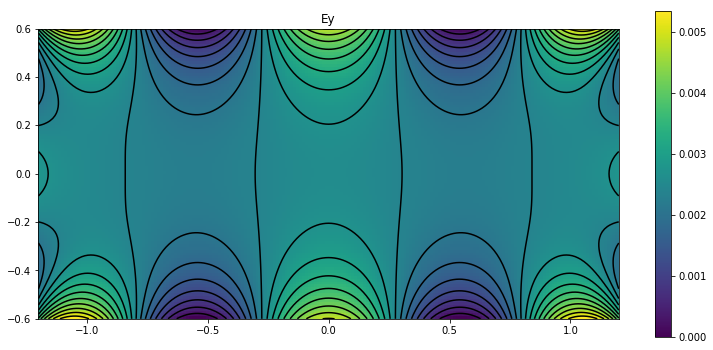

In [179]:
print('maximum field inhomogeneity : {0:.2f} %'.format(100*np.abs((E.ptp())/E[xc,yc])))

fig, ax = plt.subplots(figsize = (13,6))
ax.set_title('|E|')
pc = ax.pcolormesh(x, y, np.sqrt(Ex**2+Ey**2))
ax.contour(x, y, np.sqrt(Ex**2+Ey**2), 20, colors = 'k')
ax.set(aspect = 1);
fig.colorbar(pc);
ax.plot(w[0,:], w[1,:], '.', ms = 15)

fig, ax = plt.subplots(figsize = (13,6))
ax.set_title('Ex')
pc = ax.pcolormesh(x, y, Ex)
ax.contour(x, y, Ex, 20, colors = 'k')
ax.set(aspect = 1);
fig.colorbar(pc);

fig, ax = plt.subplots(figsize = (13,6))
ax.set_title('Ey')
pc = ax.pcolormesh(x, y, Ey-Ey.min())
ax.contour(x, y, Ey-Ey.min(), 20, colors = 'k')
ax.set(aspect = 1);
fig.colorbar(pc);

# Add wires to side

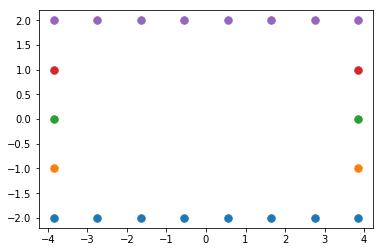

In [194]:
nwires = 4
x0wire = .55
y0wire = 2
dxwire = 1.1
dywire = 0
wires = np.zeros((3,4*nwires+6))
for n in range(nwires):
    wires[0][n] = -x0wire - n*dxwire
    wires[1][n] = y0wire + n*dywire
    wires[2][n] = 1
    wires[0][n+nwires] = x0wire + n*dxwire
    wires[1][n+nwires] = y0wire + n*dywire
    wires[2][n+nwires] = 1
    wires[0][n+nwires*2] = -x0wire - n*dxwire
    wires[1][n+nwires*2] = -y0wire - n*dywire
    wires[2][n+nwires*2] = -1
    wires[0][n+nwires*3] = x0wire + n*dxwire
    wires[1][n+nwires*3] = -y0wire - n*dywire
    wires[2][n+nwires*3] = -1

for l, idx in enumerate(range(1,4)):
    wires[0][-idx] = wires[0][nwires-1]
    wires[1][-idx] = -1+l
    wires[2][-idx] = 0.5*(-1+l)
    
for l, idx in enumerate(range(4,7)):
    wires[0][-idx] = wires[0][2*nwires-1]
    wires[1][-idx] = -1+l
    wires[2][-idx] = 0.5*(-1+l)

for v in [-1,-.5,0,.5,1]:
    plt.plot(wires.T[wires[2] == v].T[0], wires.T[wires[2] == v].T[1], '.', ms = 15);

In [197]:
y,x = np.mgrid[-.6:.6:101j,-1.2:1.2:201j]

w = wires.copy()

Ex, Ey = wires_field(x,y,w)
E = np.sqrt(Ex**2+Ey**2)
xc, yc = E.shape
xc //= 2
yc //= 2

maximum field inhomogeneity : 1.43 %


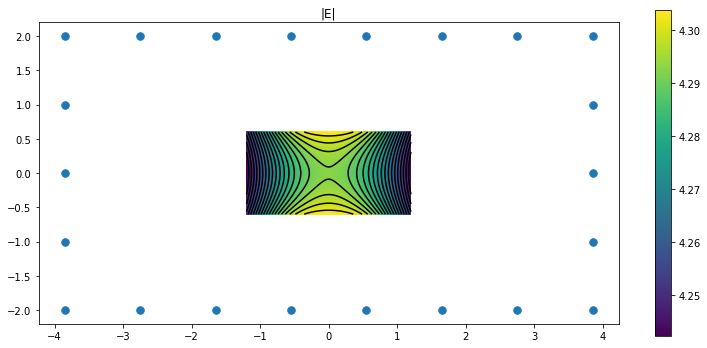

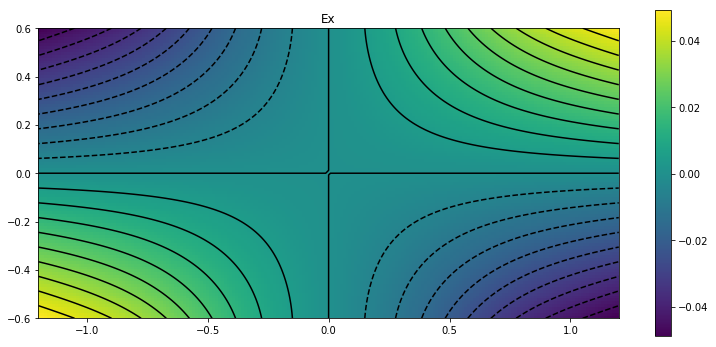

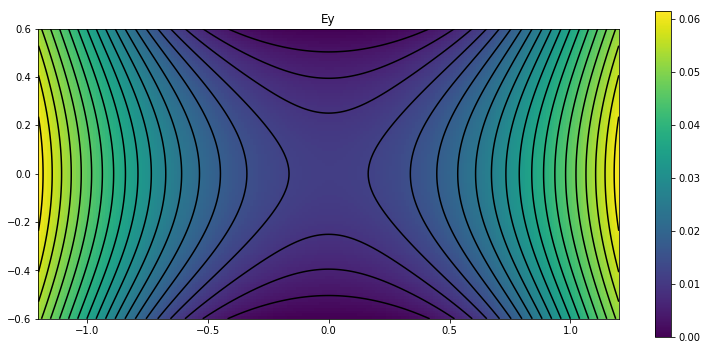

In [198]:
print('maximum field inhomogeneity : {0:.2f} %'.format(100*np.abs((E.ptp())/E[xc,yc])))

fig, ax = plt.subplots(figsize = (13,6))
ax.set_title('|E|')
pc = ax.pcolormesh(x, y, np.sqrt(Ex**2+Ey**2))
ax.contour(x, y, np.sqrt(Ex**2+Ey**2), 20, colors = 'k')
ax.set(aspect = 1);
fig.colorbar(pc);
ax.plot(w[0,:], w[1,:], '.', ms = 15)

fig, ax = plt.subplots(figsize = (13,6))
ax.set_title('Ex')
pc = ax.pcolormesh(x, y, Ex)
ax.contour(x, y, Ex, 20, colors = 'k')
ax.set(aspect = 1);
fig.colorbar(pc);

fig, ax = plt.subplots(figsize = (13,6))
ax.set_title('Ey')
pc = ax.pcolormesh(x, y, Ey-Ey.min())
ax.contour(x, y, Ey-Ey.min(), 20, colors = 'k')
ax.set(aspect = 1);
fig.colorbar(pc);

In [203]:
def minimize_function(wpos, x, y, wires):
    xc, yc = x.shape
    xc //= 2
    yc //= 2
    w = wires.copy()
    wpos = list(np.append(-wpos, wpos))*2
    w[0,:nwires*4] = wpos
    w[0,-6:] = [-max(wpos)]*3+[max(wpos)]*3
    
    Ex, Ey = wires_field(x, y, w)
    E = np.sqrt(Ex**2+Ey**2)
    return ((E-E[xc,yc])**2).sum()/E[xc,yc]**2

In [205]:
y,x = np.mgrid[-.6:.6:101j,-1.2:1.2:201j]

from scipy.optimize import minimize
bounds = [(0.1,4)]*nwires
x0 = np.array([0.9,2,3,3.9])
m = minimize(minimize_function, x0 = x0, bounds = bounds, args = (x, y, wires))

w = wires.copy()
w[0,:] = wpos = list(np.append(-m.x, m.x))*2+[-max(m.x)]*3+[max(m.x)]*3

Ex, Ey = wires_field(x,y,w)
E = np.sqrt(Ex**2+Ey**2)
xc, yc = E.shape
xc //= 2
yc //= 2

m

      fun: 1.8495447557440537e-06
 hess_inv: <4x4 LbfgsInvHessProduct with dtype=float64>
      jac: array([-7.99643734e-06,  1.80349474e-05,  6.99881289e-06, -9.73016352e-06])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 350
      nit: 53
   status: 0
  success: True
        x: array([0.42980721, 1.29591373, 1.99220668, 2.48025322])

maximum field inhomogeneity : 8.22e-03 %


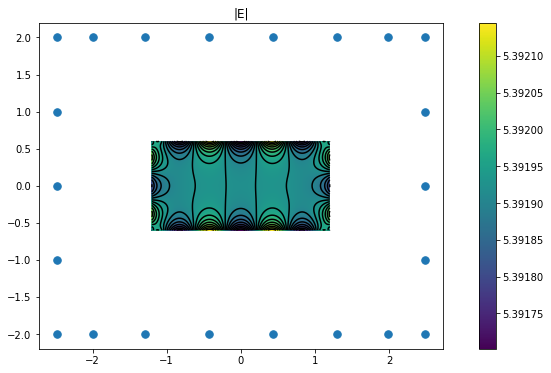

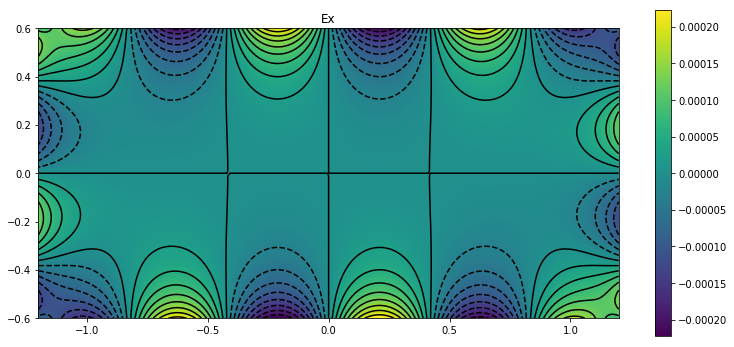

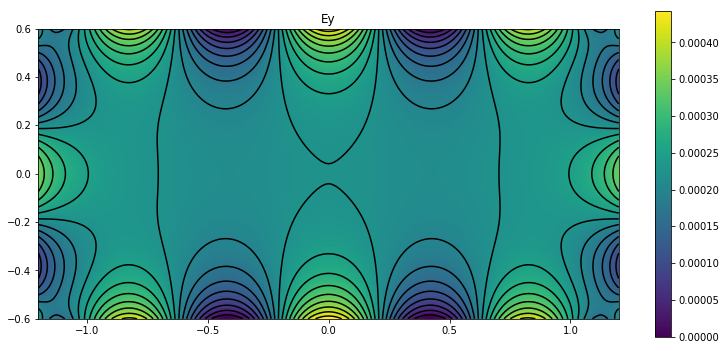

In [207]:
print('maximum field inhomogeneity : {0:.2e} %'.format(100*np.abs((E.ptp())/E[xc,yc])))

fig, ax = plt.subplots(figsize = (13,6))
ax.set_title('|E|')
pc = ax.pcolormesh(x, y, np.sqrt(Ex**2+Ey**2))
ax.contour(x, y, np.sqrt(Ex**2+Ey**2), 20, colors = 'k')
ax.set(aspect = 1);
fig.colorbar(pc);
ax.plot(w[0,:], w[1,:], '.', ms = 15)

fig, ax = plt.subplots(figsize = (13,6))
ax.set_title('Ex')
pc = ax.pcolormesh(x, y, Ex)
ax.contour(x, y, Ex, 20, colors = 'k')
ax.set(aspect = 1);
fig.colorbar(pc);

fig, ax = plt.subplots(figsize = (13,6))
ax.set_title('Ey')
pc = ax.pcolormesh(x, y, Ey-Ey.min())
ax.contour(x, y, Ey-Ey.min(), 20, colors = 'k')
ax.set(aspect = 1);
fig.colorbar(pc);